In [1]:
# Inspiración:
#https://www.kaggle.com/sudalairajkumar/simple-exploration-baseline-santander-value
#https://www.kaggle.com/mortido/keras-simple-model

In [2]:
# Librerías
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [3]:
# Muestra archivos disponibles
import os
print(os.listdir("../input"))

['test.csv', 'train.csv', 'sample_submission.csv']


In [4]:
# Carga bases disponibles
train_df = pd.read_csv('../input/train.csv')
test_df = pd.read_csv('../input/test.csv')

In [5]:
print ("Training set:")
n_data  = len(train_df)
n_features = train_df.shape[1]
print ("Number of Records: {}".format(n_data))
print ("Number of Features: {}".format(n_features))

# testing set
print ("\nTesting set:")
n_data  = len(test_df)
n_features = test_df.shape[1]
print ("Number of Records: {}".format(n_data))
print ("Number of Features: {}".format(n_features))

Training set:
Number of Records: 4459
Number of Features: 4993

Testing set:
Number of Records: 49342
Number of Features: 4992


In [6]:
train_df.head(n=10)

,ID,target,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,20aa07010,dc5a8f1d8,11d86fa6a,77c9823f2,8d6c2a0b2,4681de4fd,adf119b9a,cff75dd09,96f83a237,b8a716ebf,6c7a4567c,4fcfd2b4d,f3b9c0b95,71cebf11c,d966ac62c,68b647452,c88d108c9,ff7b471cd,d5308d8bc,0d866c3d7,bc3f77679,bd8f989f1,0eff5bf95,22ed6dba3,92b13ebba,c330f1a67,233c7c17c,2cb4d123e,eeac16933,87ffda550,...,969caa87a,00302fe51,1189ee335,ca04a07ca,f6f15ffa5,841704460,ea5ed6ff7,b1bb8eac3,8132d18b8,c24ea6548,cdfc2b069,2a879b4f7,6b119d8ce,98dea9e42,9f2471031,88458cb21,f40da20f4,7ad6b38bd,c901e7df1,8f55955dc,85dcc913d,5ca0b9b0c,eab8abf7a,8d8bffbae,2a1f6c7f9,9437d8b64,5831f4c76,2e84e09c5,d45fd5508,a165f5761,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
0,000d6aaf2,38000000.0,0.0,0,0.0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0.0,0,0.0,0,0,0.0,0,0,0.0,0,0,0,0.0,0,0.0,0,0.00,0.0,0,0.0,0,0,1300000.0,...,0,0,1100000.0,0,0,0,0.0,0.0,14800000,0.0,1200000.0,0.0,0.0,0,0,0,0,0.0,4000000,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0
1,000fbd867,600000.0,0.0,0,0.0,0,0,0,0,0,2200000.0,0.0,0.0,0,0,0,0,0.0,0,0.0,0,0,0.0,0,0,0.0,0,0,0,0.0,0,0.0,0,0.00,0.0,0,0.0,0,0,0.0,...,0,0,0.0,0,0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0
2,0027d6b71,10000000.0,0.0,0,0.0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0.0,0,0.0,0,0,0.0,0,0,0.0,0,0,0,0.0,0,0.0,0,0.00,0.0,0,0.0,0,0,0.0,...,0,0,0.0,0,0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0
3,0028cbf45,2000000.0,0.0,0,0.0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0.0,0,0.0,0,0,0.0,0,0,0.0,0,0,0,0.0,0,0.0,0,0.00,0.0,0,0.0,0,0,0.0,...,0,0,0.0,0,0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0
4,002a68644,14400000.0,0.0,0,0.0,0,0,0,0,0,2000000.0,0.0,0.0,0,0,0,0,0.0,0,0.0,0,0,0.0,0,0,0.0,0,0,0,0.0,0,0.0,0,0.00,0.0,0,0.0,0,0,0.0,...,0,0,0.0,0,0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0
5,002dbeb22,2800000.0,0.0,0,0.0,0,0,0,0,0,17020000.0,0.0,8000.0,0,0,0,0,0.0,0,5000000.0,0,0,0.0,0,0,0.0,0,0,0,12000.0,0,4600.0,12000,8891333.34,0.0,0,0.0,0,0,0.0,...,12000,0,0.0,0,0,0,0.0,0.0,0,0.0,20000000.0,0.0,0.0,0,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,12000.0,5600000.0,20000000.0,0,0,0,0,0,0,11000
6,003925ac6,164000.0,0.0,0,0.0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0.0,0,0.0,0,0,0.0,0,0,0.0,0,0,0,0.0,0,0.0,0,0.00,0.0,0,0.0,0,0,0.0,...,0,0,0.0,0,0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0,0,0,40000,0,0,0
7,003eb0261,600000.0,0.0,0,0.0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0.0,0,0.0,0,0,0.0,0,0,0.0,0,0,0,0.0,0,0.0,0,0.00,0.0,0,0.0,0,0,0.0,...,0,0,0.0,0,0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0
8,004b92275,979000.0,0.0,0,0.0,0,0,0,0,0,58000.0,0.0,0.0,0,0,22000,0,0.0,0,0.0,0,0,0.0,0,0,0.0,0,0,0,0.0,0,0.0,0,0.00,0.0,0,0.0,0,0,0.0,...,0,0,0.0,0,0,0,0.0,0.0,0,0.0,4000000.0,0.0,16000.0,0,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,22000,0.0,0.0,0.0,4000000.0,0,0,0,0,0,0,0
9,0067b4fef,460000.0,0.0,0,0.0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0.0,0,0.0,0,0,0.0,0,0,0.0,0,0,0,0.0,0,0.0,0,0.00,0.0,0,0.0,0,0,0.0,...,0,0,0.0,0,0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,400000


In [7]:
test_df.head(n=10)

,ID,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,20aa07010,dc5a8f1d8,11d86fa6a,77c9823f2,8d6c2a0b2,4681de4fd,adf119b9a,cff75dd09,96f83a237,b8a716ebf,6c7a4567c,4fcfd2b4d,f3b9c0b95,71cebf11c,d966ac62c,68b647452,c88d108c9,ff7b471cd,d5308d8bc,0d866c3d7,bc3f77679,bd8f989f1,0eff5bf95,22ed6dba3,92b13ebba,c330f1a67,233c7c17c,2cb4d123e,eeac16933,87ffda550,822e49b95,...,969caa87a,00302fe51,1189ee335,ca04a07ca,f6f15ffa5,841704460,ea5ed6ff7,b1bb8eac3,8132d18b8,c24ea6548,cdfc2b069,2a879b4f7,6b119d8ce,98dea9e42,9f2471031,88458cb21,f40da20f4,7ad6b38bd,c901e7df1,8f55955dc,85dcc913d,5ca0b9b0c,eab8abf7a,8d8bffbae,2a1f6c7f9,9437d8b64,5831f4c76,2e84e09c5,d45fd5508,a165f5761,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
0,000137c73,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.528249e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,00021489f,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0004d7953,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5000000.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,00056a333,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,20884000.0,0.0,0.0,0.0,0.0,0.0,36252000.0,0.0,20000000.0,0.0,...,0.0,0.0,25010000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,00056d8eb,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0005fc190,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,000787e86,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0008510a0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,000895faf,0.0,0.0,2.461712e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,276673.667565,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4459 entries, 0 to 4458
Columns: 4993 entries, ID to 9fc776466
dtypes: float64(1845), int64(3147), object(1)
memory usage: 169.9+ MB


In [9]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49342 entries, 0 to 49341
Columns: 4992 entries, ID to 9fc776466
dtypes: float64(4991), object(1)
memory usage: 1.8+ GB


In [10]:
#### Check if there are any NULL values in Train Data
print("Total Train Features with NaN Values = " + str(train_df.columns[train_df.isnull().sum() != 0].size))
if (train_df.columns[train_df.isnull().sum() != 0].size):
    print("Features with NaN => {}".format(list(train_df.columns[train_df.isnull().sum() != 0])))
    train_df[train_df.columns[train_df.isnull().sum() != 0]].isnull().sum().sort_values(ascending = False)

Total Train Features with NaN Values = 0


In [11]:
#### Check if there are any NULL values in Test Data
print("Total Test Features with NaN Values = " + str(test_df.columns[test_df.isnull().sum() != 0].size))
if (test_df.columns[test_df.isnull().sum() != 0].size):
    print("Features with NaN => {}".format(list(test_df.columns[test_df.isnull().sum() != 0])))
    test_df[test_df.columns[test_df.isnull().sum() != 0]].isnull().sum().sort_values(ascending = False)

Total Test Features with NaN Values = 0


In [12]:
x_train = train_df.drop(["ID", "target"], axis=1)
y_train = np.log1p(train_df["target"].values)

x_test = test_df.drop(["ID"], axis=1)

In [13]:
# check and remove constant columns
colsToRemove = []
for col in x_train.columns:
    if x_train[col].std() == 0: 
        colsToRemove.append(col)
        
# remove constant columns in the training set
x_train.drop(colsToRemove, axis=1, inplace=True)

# remove constant columns in the test set
x_test.drop(colsToRemove, axis=1, inplace=True) 

print("Removed `{}` Constant Columns\n".format(len(colsToRemove)))
#print(colsToRemove)

Removed `256` Constant Columns



In [14]:
# Check and remove duplicate columns
colsToRemove = []
colsScaned = []
dupList = {}

columns = x_train.columns

for i in range(len(columns)-1):
    v = x_train[columns[i]].values
    dupCols = []
    for j in range(i+1,len(columns)):
        if np.array_equal(v, x_train[columns[j]].values):
            colsToRemove.append(columns[j])
            if columns[j] not in colsScaned:
                dupCols.append(columns[j]) 
                colsScaned.append(columns[j])
                dupList[columns[i]] = dupCols
                
# remove duplicate columns in the training set
x_train.drop(colsToRemove, axis=1, inplace=True) 

# remove duplicate columns in the testing set
x_test.drop(colsToRemove, axis=1, inplace=True)

print("Removed `{}` Duplicate Columns\n".format(len(dupList)))
print(dupList)

Removed `4` Duplicate Columns

{'34ceb0081': ['d60ddde1b'], '8d57e2749': ['acc5b709d', 'f333a5f60'], '168b3e5bc': ['f8d75792f'], 'a765da8bc': ['912836770']}


In [15]:


# Ajusta distribución de variables
#x_train = np.log1p(x_train)
#x_test = np.log1p(x_test)

# Junta bases para obtener estadísticos de media y desviación estándar
x_total = pd.concat((x_test, x_train), axis=0).replace(0,  np.nan)

# Escala valores
x_train = (x_train -x_total.mean()) / x_total.std()
x_test = (x_test -x_total.mean()) /x_total.std()

# Escala variable objetvo

In [16]:
# Genera base de entrenamiento y validación
dev_x, val_x, dev_y, val_y = train_test_split(x_train, y_train, test_size = 0.2, random_state = 45)

In [39]:
# Definición del modelo
from keras import models
from keras import layers
from keras import regularizers

model = models.Sequential()
model.add(layers.Dense(2000, kernel_regularizer=regularizers.l2(0.05), activation='linear', input_shape=(x_train.shape[1],)))
model.add(layers.BatchNormalization())
model.add(layers.Activation('tanh'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(1024, kernel_regularizer=regularizers.l2(0.05), activation='linear'))
model.add(layers.BatchNormalization())
model.add(layers.LeakyReLU(alpha=0.3))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(512, kernel_regularizer=regularizers.l2(0.05), activation='linear'))
model.add(layers.BatchNormalization())
model.add(layers.LeakyReLU(alpha=0.3))

model.add(layers.Dense(32, activation='relu'))
model.add(layers.BatchNormalization())

model.add(layers.Dense(1))

In [40]:
import keras.backend as K
from keras.optimizers import Adam

# Función de pérdida-metrica
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1)) 
    
# Compilando el modelo
model.compile(optimizer=Adam(lr=0.01),
              loss=root_mean_squared_error,
              metrics=[root_mean_squared_error])

In [41]:
import keras
batch_size = 256
epochs = 100

lr_scheduler = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=1, verbose=1, mode='auto', min_delta=0.0001, cooldown=0, min_lr=0.00001)
es = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.00005, patience=5, verbose=0, mode='auto')

# Entrenando el modelo
history = model.fit(#dev_x,
                    #dev_y,
                    x_train,
                    y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    #callbacks=[lr_scheduler, es],
                    validation_data=(val_x, val_y))

Train on 4459 samples, validate on 892 samples
Epoch 1/100
4459/4459 [==============================] - 3s 622us/step - loss: 57.0060 - root_mean_squared_error: 13.5588 - val_loss: 19.9356 - val_root_mean_squared_error: 10.5119
Epoch 2/100
4459/4459 [==============================] - 1s 184us/step - loss: 30.2872 - root_mean_squared_error: 9.8367 - val_loss: 118.3080 - val_root_mean_squared_error: 68.5188
Epoch 3/100
4459/4459 [==============================] - 1s 184us/step - loss: 33.0262 - root_mean_squared_error: 3.5245 - val_loss: 19.9375 - val_root_mean_squared_error: 3.5481
Epoch 4/100
4459/4459 [==============================] - 1s 183us/step - loss: 17.6392 - root_mean_squared_error: 1.7149 - val_loss: 37.5791 - val_root_mean_squared_error: 8.8625
Epoch 5/100
4459/4459 [==============================] - 1s 184us/step - loss: 33.0587 - root_mean_squared_error: 1.6627 - val_loss: 26.6570 - val_root_mean_squared_error: 1.5708
Epoch 6/100
4459/4459 [==============================]

Epoch 47/100
4459/4459 [==============================] - 1s 184us/step - loss: 7.7801 - root_mean_squared_error: 1.3387 - val_loss: 8.4537 - val_root_mean_squared_error: 2.0937
Epoch 48/100
4459/4459 [==============================] - 1s 187us/step - loss: 8.7027 - root_mean_squared_error: 1.3428 - val_loss: 10.4198 - val_root_mean_squared_error: 2.5551
Epoch 49/100
4459/4459 [==============================] - 1s 192us/step - loss: 10.2479 - root_mean_squared_error: 1.3356 - val_loss: 11.8259 - val_root_mean_squared_error: 3.9617
Epoch 50/100
4459/4459 [==============================] - 1s 192us/step - loss: 8.7296 - root_mean_squared_error: 1.3441 - val_loss: 15.9405 - val_root_mean_squared_error: 7.1544
Epoch 51/100
4459/4459 [==============================] - 1s 192us/step - loss: 9.8661 - root_mean_squared_error: 1.3382 - val_loss: 8.5128 - val_root_mean_squared_error: 2.3228
Epoch 52/100
4459/4459 [==============================] - 1s 192us/step - loss: 8.0822 - root_mean_squared

Epoch 93/100
4459/4459 [==============================] - 1s 185us/step - loss: 7.7509 - root_mean_squared_error: 1.3354 - val_loss: 7.7494 - val_root_mean_squared_error: 2.1273
Epoch 94/100
4459/4459 [==============================] - 1s 183us/step - loss: 7.7129 - root_mean_squared_error: 1.3184 - val_loss: 7.5287 - val_root_mean_squared_error: 1.4105
Epoch 95/100
4459/4459 [==============================] - 1s 183us/step - loss: 7.2651 - root_mean_squared_error: 1.3345 - val_loss: 7.2227 - val_root_mean_squared_error: 1.4228
Epoch 96/100
4459/4459 [==============================] - 1s 184us/step - loss: 7.9099 - root_mean_squared_error: 1.3313 - val_loss: 10.6154 - val_root_mean_squared_error: 3.4971
Epoch 97/100
4459/4459 [==============================] - 1s 185us/step - loss: 8.8579 - root_mean_squared_error: 1.3298 - val_loss: 8.4523 - val_root_mean_squared_error: 1.3810
Epoch 98/100
4459/4459 [==============================] - 1s 184us/step - loss: 8.2153 - root_mean_squared_er

In [42]:
history1 = model.fit(#dev_x,
                    #dev_y,
                    x_train,
                    y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    #callbacks=[lr_scheduler, es],
                    validation_data=(val_x, val_y))

Train on 4459 samples, validate on 892 samples
Epoch 1/100
4459/4459 [==============================] - 1s 185us/step - loss: 8.0993 - root_mean_squared_error: 1.3351 - val_loss: 7.1816 - val_root_mean_squared_error: 1.3423
Epoch 2/100
4459/4459 [==============================] - 1s 185us/step - loss: 7.4768 - root_mean_squared_error: 1.3338 - val_loss: 7.4501 - val_root_mean_squared_error: 1.4566
Epoch 3/100
4459/4459 [==============================] - 1s 186us/step - loss: 7.6448 - root_mean_squared_error: 1.3350 - val_loss: 9.6064 - val_root_mean_squared_error: 2.2670
Epoch 4/100
4459/4459 [==============================] - 1s 184us/step - loss: 7.6494 - root_mean_squared_error: 1.3291 - val_loss: 9.3793 - val_root_mean_squared_error: 3.1432
Epoch 5/100
4459/4459 [==============================] - 1s 184us/step - loss: 7.5354 - root_mean_squared_error: 1.3282 - val_loss: 10.4725 - val_root_mean_squared_error: 3.9913
Epoch 6/100
4459/4459 [==============================] - 1s 186us/s

Epoch 47/100
4459/4459 [==============================] - 1s 183us/step - loss: 7.6370 - root_mean_squared_error: 1.3314 - val_loss: 7.5986 - val_root_mean_squared_error: 1.3721
Epoch 48/100
4459/4459 [==============================] - 1s 184us/step - loss: 7.0753 - root_mean_squared_error: 1.3342 - val_loss: 7.5495 - val_root_mean_squared_error: 1.4736
Epoch 49/100
4459/4459 [==============================] - 1s 184us/step - loss: 7.0254 - root_mean_squared_error: 1.3250 - val_loss: 7.2703 - val_root_mean_squared_error: 1.4366
Epoch 50/100
4459/4459 [==============================] - 1s 184us/step - loss: 6.8762 - root_mean_squared_error: 1.3227 - val_loss: 7.2683 - val_root_mean_squared_error: 1.4992
Epoch 51/100
4459/4459 [==============================] - 1s 184us/step - loss: 7.1887 - root_mean_squared_error: 1.3417 - val_loss: 6.5811 - val_root_mean_squared_error: 1.3695
Epoch 52/100
4459/4459 [==============================] - 1s 184us/step - loss: 6.8208 - root_mean_squared_err

4459/4459 [==============================] - 1s 184us/step - loss: 6.8403 - root_mean_squared_error: 1.3189 - val_loss: 6.8637 - val_root_mean_squared_error: 1.8856
Epoch 94/100
4459/4459 [==============================] - 1s 185us/step - loss: 6.6234 - root_mean_squared_error: 1.3124 - val_loss: 6.3729 - val_root_mean_squared_error: 1.4311
Epoch 95/100
4459/4459 [==============================] - 1s 183us/step - loss: 6.8808 - root_mean_squared_error: 1.3209 - val_loss: 6.8081 - val_root_mean_squared_error: 1.4897
Epoch 96/100
4459/4459 [==============================] - 1s 183us/step - loss: 6.4567 - root_mean_squared_error: 1.3209 - val_loss: 7.0963 - val_root_mean_squared_error: 1.8675
Epoch 97/100
4459/4459 [==============================] - 1s 185us/step - loss: 6.4407 - root_mean_squared_error: 1.3240 - val_loss: 5.7066 - val_root_mean_squared_error: 1.4220
Epoch 98/100
4459/4459 [==============================] - 1s 183us/step - loss: 6.2183 - root_mean_squared_error: 1.3190 - 

In [21]:
history_dict = history.history
#history_dict.keys()
history_dict

{'val_loss': [767.2375871461603,
  993.4110140265906,
  770.0044763676254,
  545.205770312938,
  391.0640074041392,
  290.6737443727228,
  224.88591119740576,
  180.7616741368589,
  150.23581698977893,
  128.38762668216174,
  112.20835992787451,
  99.83275501610453,
  90.081410053065,
  82.19162103627295,
  75.65842879085797,
  70.13947956444437,
  65.39703810482281,
  61.262126460738244,
  57.61179902628398,
  54.35464265421367,
  51.421296859535936,
  48.75811827450055,
  46.32298720150251,
  44.082326675209764,
  42.00906159952617,
  40.08114630865944,
  38.280448981999285,
  36.5919549711082,
  35.00315210316748,
  33.50354010748757,
  32.084257459426674,
  30.737780216028874,
  29.45768797664899,
  28.23846604898906,
  27.07535040645856,
  25.964192848034504,
  24.901363706374916,
  23.883668138307307,
  22.908260131630662,
  21.97259390621442,
  21.074385570303743,
  20.21155526712871,
  19.38220248200968,
  18.58458170869425,
  17.81708369233683,
  17.078207614710514,
  16.36654

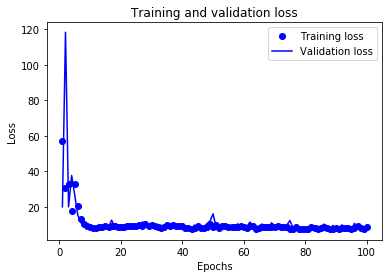

In [48]:
# Muestra el gráfico del entrenamiento
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1,101)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

100
100


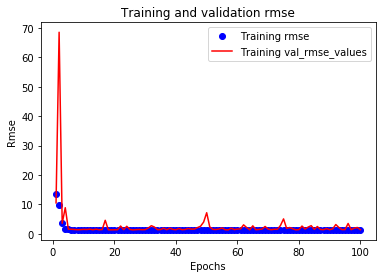

In [49]:
plt.clf()
rmse_values = history_dict['root_mean_squared_error']
print(len(rmse_values))
val_rmse_values = history_dict['val_root_mean_squared_error']
print(len(epochs))
epochs = range(1, 101)
plt.plot(epochs, rmse_values, 'bo', label='Training rmse')
plt.plot(epochs, val_rmse_values, 'red', label='Training val_rmse_values')
plt.title('Training and validation rmse')

plt.xlabel('Epochs')
plt.ylabel('Rmse')
plt.legend()
plt.show()

In [24]:
#import matplotlib.pyplot as plt
#import seaborn as sns
#%matplotlib inline
#plt.figure(figsize=(12,8))
#sns.distplot( np.log1p(train_df["target"].values), bins=1413, kde=False)
#plt.xlabel('Target', fontsize=12)
#plt.title("Log of Target Histogram", fontsize=14)
#plt.show()

In [43]:
y_pre = model.predict(x_test.iloc[0:3])
y_pre

array([[15.423452],
       [14.603828],
       [14.750247]], dtype=float32)

In [44]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 2000)              9462000   
_________________________________________________________________
batch_normalization_2 (Batch (None, 2000)              8000      
_________________________________________________________________
activation_1 (Activation)    (None, 2000)              0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 2000)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 1024)              2049024   
_________________________________________________________________
batch_normalization_3 (Batch (None, 1024)              4096      
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 1024)              0         
__________

In [45]:
pred_keras = np.expm1(model.predict(x_test))


In [46]:
pred_keras

array([[4992524. ],
       [2199692.2],
       [2546541.2],
       ...,
       [1897796.2],
       [2134456. ],
       [2112425.5]], dtype=float32)

In [47]:
sub = pd.read_csv('../input/sample_submission.csv')
sub["target"] = pred_keras

print(sub.head(20))
sub.to_csv('keras_modelo_v3.csv', index=False)

           ID       target
0   000137c73  4992524.000
1   00021489f  2199692.250
2   0004d7953  2546541.250
3   00056a333  6142239.500
4   00056d8eb  2276806.250
5   0005fc190  2054505.625
6   000787e86  2226655.250
7   0008510a0  1963027.125
8   000895faf  2069969.750
9   000986fba  4722560.000
10  0009efcc5  2736859.000
11  000dd8f00  2147511.250
12  000e1cdc2  2078489.625
13  00103739c  2174440.250
14  00134b367  2024790.000
15  001788d0d  3047317.000
16  0019c8ad7  2142346.250
17  001a267b9  2285052.750
18  001a85486  2192094.500
19  001c4de06  2508086.750


In [30]:
y_train

array([17.45309674, 13.3046866 , 16.11809575, ..., 14.84513033,
       16.11809575, 16.81124288])

In [31]:
#import gc
#gc.collect()